In [116]:
import cv2
import csv
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn import svm,metrics

In [117]:
data=[]
label=[]

with open('cleaned_data.csv') as f:
    reader=csv.reader(f)
    next(reader)
    for row in reader:
        if row:
            label.append(int(row[0]))
            data.append([int(x) for x in row[1:]])


data = np.array(data) 
label = np.array(label)

permutation = np.random.permutation(len(data))

data = data[permutation]
label = label[permutation]

print(data.shape)  
print(label.shape)  

print(data[0].shape)
print(data)
print(label)

(1000, 784)
(1000,)
(784,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[8 5 9 4 2 3 2 4 8 4 3 4 5 5 0 0 8 4 4 6 1 2 9 0 5 9 1 1 7 5 9 5 1 8 1 0 1
 2 0 9 5 7 8 2 8 1 6 5 6 9 6 3 4 3 8 5 1 8 1 9 7 9 9 8 6 0 7 7 1 0 0 4 0 9
 2 1 6 7 7 9 5 2 7 0 8 2 5 6 7 2 0 8 6 5 1 9 2 1 2 9 0 1 3 0 8 7 4 3 8 0 0
 9 6 3 8 6 3 8 0 1 4 0 7 4 4 6 9 6 6 2 3 0 6 9 3 2 1 2 0 3 3 4 8 5 4 1 9 1
 5 6 6 7 0 9 9 4 7 4 7 9 3 4 4 9 7 9 3 6 6 4 3 0 2 4 4 3 7 0 6 6 9 3 8 0 1
 3 0 8 2 8 6 9 8 4 7 7 3 6 2 7 3 5 0 9 9 5 6 0 2 0 9 1 1 2 2 2 4 5 9 7 1 7
 0 1 3 9 4 0 7 6 6 2 8 4 5 5 5 6 9 0 9 1 1 0 3 7 7 5 2 2 2 4 5 3 8 6 9 2 7
 5 9 0 9 1 3 3 1 3 1 3 7 7 3 4 7 2 9 2 2 3 5 4 5 8 7 1 6 7 2 9 3 8 2 3 8 8
 6 9 7 1 7 3 7 3 5 1 8 5 4 6 1 7 1 8 8 9 9 6 7 8 2 3 4 6 1 2 3 1 3 5 5 6 9
 2 1 7 0 4 2 9 8 6 5 2 7 0 9 8 6 0 0 6 1 1 3 6 6 3 2 2 7 9 7 2 5 4 3 6 8 0
 2 4 5 0 6 8 4 5 8 2 6 8 0 8 5 2 4 0 1 4 6 7 0 9 6 8 3 2 4 2 3 0 8 8 5 8 9
 9 5 1 7 4 0 5 3 3 8 8 8 4 5

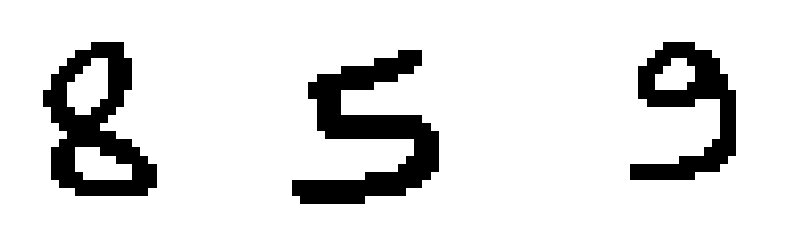

In [118]:
_,axes = plt.subplots(1, 3, figsize=(10,3))
for i in range(3):
    axes[i].imshow(data[i].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    axes[i].axis('off')
plt.show()

In [119]:
clf=svm.SVC(gamma=0.001)
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.20, random_state=42)
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

0.905


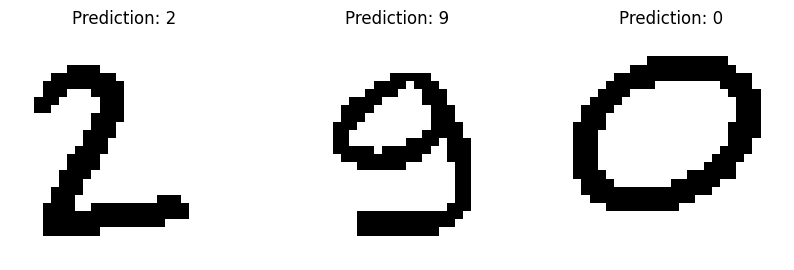

In [120]:
_,axes = plt.subplots(1, 3, figsize=(10,3))
for i in range(3):
    random_index = np.random.randint(0, len(X_test))
    axes[i].imshow(X_test[random_index].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    axes[i].axis('off')
    axes[i].set_title('Prediction: %i' % clf.predict([X_test[random_index]])[0])
plt.show()

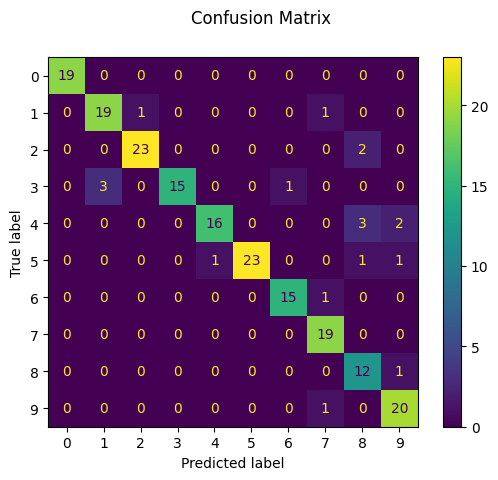

In [121]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, clf.predict(X_test))
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()